In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_config
from plot import plot_dequeue_retries, plot_number_of_baskets, plot_pairwise_and_cointoss_speedup, plot_delay_and_threads
from interpret_counters import interpret_counters, get_baskets_utilization, MS_QUEUE_NAME_TAGGED_PTR, MS_QUEUE_COUNTER_LABELS, BASKETS_QUEUE_COUNTER_LABELS
from helpers import compare_two_queues, get_difference_in_time_between_threads
# Stop pandas from truncating output.
sns.color_palette("colorblind")
sns.set_style("whitegrid")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

In [3]:
baskets_queue_tp_name = "Baskets Queue using Tagged Pointers"
baskets_queue_dwcas_name = "Baskets Queue using DWCAS"
ms_queue_tp_name = "MS Queue using Tagged Pointers"
ms_queue_dwcas_name = "MS Queue using DWCAS"
two_lock_queue_name = "MS Two-Lock TTAS"

In [4]:
net_runtime_key = "net_runtime_s"
tables_dir = "../../write_up/thesis/tables/"

df_pairwise = pd.read_csv("../../enqueue_dequeue_results.csv")
df_coin_toss = pd.read_csv("../../p_enqueue_dequeue_results.csv")

queue_names = ["MS Queue", "MS Two", "Baskets Queue", "Valois Queue"]
dataframes = [("Pairwise df", df_pairwise), ("50% Enqueue", df_coin_toss)]

# Workload Under One Thread
The sequential latency of a queue is determined by its algorithmic
complexity~\citep{valois1995datastructures}. Contention-reducing mechanisms,
such as thread helping, are not triggered under single threaded workloads, as
they rely on failed Compare-and-Swaps, adding extra overhead through the
computation of predicates. Figure \ref{fig:perf_1_thread} shows the performance
of each queue in a single threaded workload.

The *MS-Queue* and the *Baskets Queue* using tagged pointers are at most
**3.168** and **2.593** times faster than their DWCAS counterparts.

In [5]:
temp = compare_two_queues(df_pairwise, baskets_queue_tp_name, baskets_queue_dwcas_name, 1)
temp

,Delay,Baskets Queue using Tagged Pointers is x% slower than Baskets Queue using DWCAS,Is Slower?
9,0,-139.69729,False
10,50,-245.68688,False
11,100,-248.25875,False
12,150,-253.86068,False
13,200,-220.86447,False
14,250,-227.75835,False
15,500,-194.62081,False
16,750,-164.76081,False
17,1000,-175.25723,False


In [6]:
temp = compare_two_queues(df_pairwise, ms_queue_tp_name, ms_queue_dwcas_name, 1)
temp

,Delay,MS Queue using Tagged Pointers is x% slower than MS Queue using DWCAS,Is Slower?
27,0,-106.28731,False
28,50,-195.24571,False
29,100,-187.73006,False
30,150,-185.27766,False
31,200,-184.76579,False
32,250,-192.58078,False
33,500,-316.79032,False
34,750,-154.60441,False
35,1000,-149.80382,False


Under the *pairwise benchmark*, the
*MS-Queue* and the *Baskets Queue* using tagged pointers are at most
**3.168** and **2.593** times faster than their DWCAS counterparts;
The *Baskets Queue* is consistently outperformed by the *MS-Queue*
and the *Two-Lock Queue* (respectively, at most **0.450** and **0.516** times slower).

In [7]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, two_lock_queue_name, 1)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
9,0,11.61664,True
10,50,18.18795,True
11,100,17.90528,True
12,150,20.05077,True
13,200,15.37012,True
14,250,13.71188,True
15,500,45.03438,True
16,750,27.33162,True
17,1000,26.26337,True


In [8]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, ms_queue_tp_name, 1)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Queue using Tagged Pointers,Is Slower?
9,0,11.62117,True
10,50,17.35363,True
11,100,13.82429,True
12,150,14.16076,True
13,200,20.57002,True
14,250,19.94733,True
15,500,51.60021,True
16,750,25.05496,True
17,1000,25.06639,True


In [9]:
compare_two_queues(df_pairwise, ms_queue_tp_name, two_lock_queue_name, 1)

,Delay,MS Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
27,0,-0.00512,False
28,50,1.00950,True
29,100,4.73566,True
30,150,6.86167,True
31,200,-6.54652,False
32,250,-7.78918,False
33,500,-13.56582,False
34,750,3.03778,True
35,1000,1.59739,True


In [10]:
compare_two_queues(df_coin_toss, two_lock_queue_name, ms_queue_tp_name, 1)

,Delay,MS Two-Lock TTAS is x% slower than MS Queue using Tagged Pointers,Is Slower?
36,0,-1.60590,False
37,50,-0.89536,False
38,100,-0.39049,False
39,150,-1.41490,False
40,200,-5.67724,False
41,250,-5.63589,False
42,500,-27.05768,False
43,750,-7.02484,False
44,1000,-4.58892,False


# Workload Under Two Threads

Similar to \citep{michael1996simple,hoffman2007baskets,ladan2008optimistic},
under a workload of two threads, a significant degradation in performance can
be observed. \citeauthor{michael1996simple} notes that as each queue's head and
tail are shared across two processors, cache misses are more frequent. Figure
\ref{fig:perf_deg_1_thread} shows the ratio of time taken between two-threaded
and single threaded workloads, which represents the magnitude of performance
degradation between both workloads.

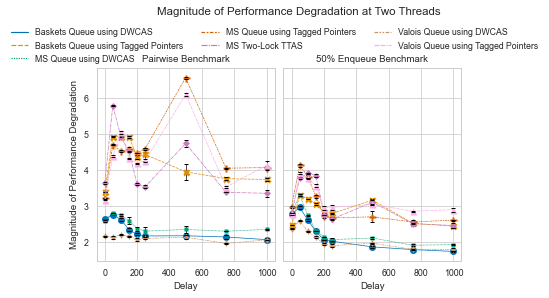

In [11]:
fig = plot_pairwise_and_cointoss_speedup(df_pairwise, df_coin_toss, 1, False)

Queues using tagged pointers tend to
experience higher contention, consequently leading to a harsher degradation in
performance; in support of this claim, the *Baskets Queue using Tagged Pointers*
with 50 nanoseconds of delay was **2.435** times more likely to re-attempt an enqueue than its DWCAS counterpart.

In [12]:
enqueue_counter_key = "enqueue_count (E05-E06)"
def interpret_enqueue_count_counter(df, name):
    temp: pd.DataFrame = interpret_counters(df, BASKETS_QUEUE_COUNTER_LABELS, name)
    return temp.loc[temp["threads"] == 2][["delay", enqueue_counter_key]]

enqueue_count = 11000000
baskets_tp_enqueue_counters = interpret_enqueue_count_counter(df_pairwise, baskets_queue_tp_name) - enqueue_count
baskets_dwcas_enqueue_counters = interpret_enqueue_count_counter(df_pairwise, baskets_queue_dwcas_name) - enqueue_count

baskets_tp_enqueue_counters = np.array(baskets_tp_enqueue_counters[enqueue_counter_key]) 
baskets_dwcas_enqueue_counters = np.array(baskets_dwcas_enqueue_counters[enqueue_counter_key])

(baskets_tp_enqueue_counters / baskets_dwcas_enqueue_counters).round(3)

array([1.606, 2.435, 0.05 , 0.012, 0.004, 0.014, 0.016, 0.   , 0.001])

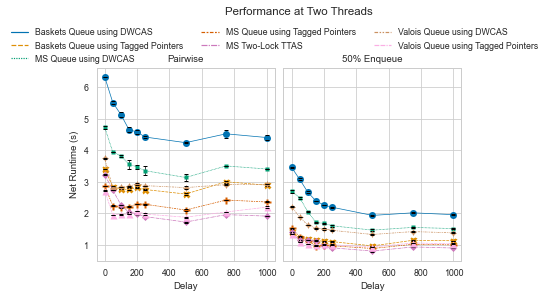

In [13]:
fig = plot_delay_and_threads(2, [df_pairwise, df_coin_toss], False)

In [14]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, ms_queue_tp_name, 2)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Queue using Tagged Pointers,Is Slower?
9,0,15.98143,True
10,50,20.97837,True
11,100,20.95851,True
12,150,19.99076,True
13,200,18.59696,True
14,250,16.97015,True
15,500,19.38528,True
16,750,19.27436,True
17,1000,18.39348,True


In [15]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, two_lock_queue_name, 2)


,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
9,0,5.44102,True
10,50,3.72343,True
11,100,17.93537,True
12,150,26.51975,True
13,200,30.19812,True
14,250,31.15693,True
15,500,33.96065,True
16,750,34.67161,True
17,1000,33.85990,True


In [16]:
compare_two_queues(df_coin_toss, two_lock_queue_name, ms_queue_tp_name, 2)


,Delay,MS Two-Lock TTAS is x% slower than MS Queue using Tagged Pointers,Is Slower?
36,0,-9.06649,False
37,50,-10.49763,False
38,100,1.94326,True
39,150,13.89624,True
40,200,-4.28063,False
41,250,-7.09675,False
42,500,-10.06226,False
43,750,-8.97114,False
44,1000,-11.10026,False


# Workload Under Four Threads
Under workloads with no delay, the pairwise benchmark shows that the *Baskets Queue* is **0.259%** slower than
the *MS-Queue*; however, at delays of 50 and 100 nanoseconds, the *Baskets Queue*
is respectively **0.765%** and **3.668%** faster than the *MS-Queue*.

When delays are greater than 100 nanoseconds, the *MS-Queue* outperforms the *Baskets Queue* by at most **26.074%**.

In [17]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, ms_queue_tp_name, 4)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Queue using Tagged Pointers,Is Slower?
9,0,0.25934,True
10,50,-0.76486,False
11,100,-3.66771,False
12,150,8.93393,True
13,200,26.07437,True
14,250,25.16429,True
15,500,20.65794,True
16,750,12.30531,True
17,1000,12.27915,True


As a consequence of the *Baskets Queue* requiring more Compare-and-Swaps to
facilitate its thread helping mechanisms, it requires far more attempted dequeues than
what is required by the *MS-Queue*. 

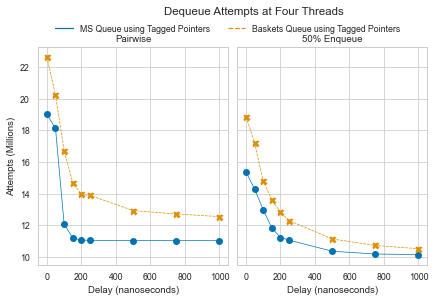

In [18]:
fig = plot_dequeue_retries(df_pairwise, df_coin_toss, 4, False)

 On the other hand, the *50% Enqueue Benchmark* shows that the *Baskets Queue* is up to **42.047%** faster than the *MS-Queue*.

In [19]:
compare_two_queues(df_coin_toss, baskets_queue_tp_name, ms_queue_tp_name, 4)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Queue using Tagged Pointers,Is Slower?
9,0,-35.86887,False
10,50,-42.04709,False
11,100,-34.31596,False
12,150,-14.88007,False
13,200,-7.05722,False
14,250,-1.76579,False
15,500,12.92182,True
16,750,16.92281,True
17,1000,15.97080,True


 The characteristics of the *50% Enqueue Benchmark* allowed for the *Baskets Queue* to utilize its key thread-helping mechanism up to **110.964** times more than in the *Pairwise Benchmark*

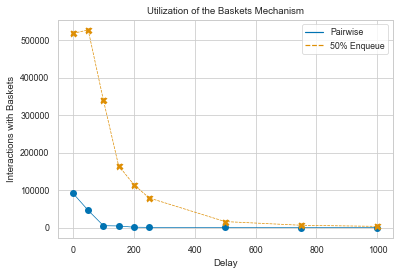

In [20]:
plot_number_of_baskets(df_pairwise, df_coin_toss, 4, False)

In [21]:
temp = get_baskets_utilization(df_pairwise, df_coin_toss, 4).groupby(by=["name", "delay"], as_index=False)
key = "enqueue_build_basket_count (E18-E19)"

temp = temp[key].mean()
temp = temp.set_index("name")
max(np.array(temp.loc["50% Enqueue"][key]) / np.array(temp.loc["Pairwise"][key])).round(3)

110.964

# Oversubscription
## Workload Under Five Threads

In this study, processors are oversubscribed by pinning more than one process
to each processor, forcing the thread scheduler to increase the frequency of
context-switches.

Figure [cell 18] shows that between 0 and 150 nanoseconds of delay, the
magnitude of performance degradation is a linear function of delay; As delays
greater than 150 nanoseconds are used, performance degradation explodes.
One may hypothesize that the sudden explosion in performance degradation is a result of
the significantly decreased time between context switches; as delay increases, 
the total CPU time available is further reduced.

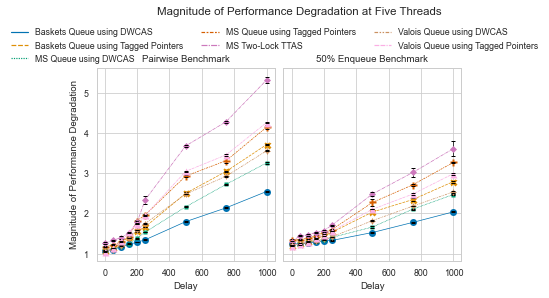

In [22]:
_ = plot_pairwise_and_cointoss_speedup(df_pairwise, df_coin_toss, 4, False)

In the pairwise benchmark, between 0 and 250 nanoseconds of delay, the *Baskets
Queue* and the *MS-Queue* are at most **47.045%** and **60.604%** faster than the *two-lock queue*;
Between 500 and 1000 nanoseconds, the *two-lock queue* is at most **3.351%** faster than the baskets queue.

In [23]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, two_lock_queue_name, 5)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
9,0,-28.56671,False
10,50,-36.86334,False
11,100,-45.74752,False
12,150,-47.04521,False
13,200,-25.63621,False
14,250,-3.02426,False
15,500,3.35090,True
16,750,2.65572,True
17,1000,2.08757,True


In [24]:
compare_two_queues(df_pairwise, ms_queue_tp_name, two_lock_queue_name, 5)

,Delay,MS Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
27,0,-17.31595,False
28,50,-26.32318,False
29,100,-38.03046,False
30,150,-60.60426,False
31,200,-45.43427,False
32,250,-16.63372,False
33,500,-3.91190,False
34,750,-2.05028,False
35,1000,0.01452,True


Similar to the trends observed under a workload of four threads, the *Baskets
Queue* significantly outperforms the *MS-Queue* (by at most **53.645%**) only
in the *50% Enqueue Benchmark*. This repeating pattern shows that the performance of the
*Baskets Queue* is heavily dependent on the utilization of the baskets mechanism.

In [25]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, ms_queue_tp_name, 5)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Queue using Tagged Pointers,Is Slower?
9,0,-9.59014,False
10,50,-8.34380,False
11,100,-5.59084,False
12,150,8.44253,True
13,200,13.61306,True
14,250,11.66855,True
15,500,6.98938,True
16,750,4.61146,True
17,1000,2.07335,True


The *Baskets Queue* stops outperforming the *MS Queue* between delays of 500 and 1000 nanoseconds, as the baskets thread-helping mechanism is not utilized as often.

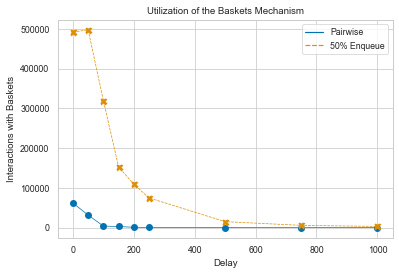

In [26]:
plot_number_of_baskets(df_pairwise, df_coin_toss, 5, False)


The *two-lock* queue is only competitive with the non-blocking queues during low-contention workloads.

In [27]:
compare_two_queues(df_coin_toss, baskets_queue_tp_name, ms_queue_tp_name, 5)

,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Queue using Tagged Pointers,Is Slower?
9,0,-51.82548,False
10,50,-53.64545,False
11,100,-43.71092,False
12,150,-20.56665,False
13,200,-14.06120,False
14,250,-6.28593,False
15,500,2.76146,True
16,750,3.90213,True
17,1000,1.56998,True


In [28]:
compare_two_queues(df_pairwise, baskets_queue_tp_name, two_lock_queue_name, 5)


,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
9,0,-28.56671,False
10,50,-36.86334,False
11,100,-45.74752,False
12,150,-47.04521,False
13,200,-25.63621,False
14,250,-3.02426,False
15,500,3.35090,True
16,750,2.65572,True
17,1000,2.08757,True


In [29]:
compare_two_queues(df_coin_toss, baskets_queue_tp_name, two_lock_queue_name, 5)


,Delay,Baskets Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
9,0,-19.83983,False
10,50,-41.74789,False
11,100,-68.24390,False
12,150,-80.35674,False
13,200,-60.41096,False
14,250,-49.05248,False
15,500,-5.55280,False
16,750,3.81795,True
17,1000,1.67338,True


In [30]:
compare_two_queues(df_pairwise, ms_queue_tp_name, two_lock_queue_name, 5)


,Delay,MS Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
27,0,-17.31595,False
28,50,-26.32318,False
29,100,-38.03046,False
30,150,-60.60426,False
31,200,-45.43427,False
32,250,-16.63372,False
33,500,-3.91190,False
34,750,-2.05028,False
35,1000,0.01452,True


In [31]:
compare_two_queues(df_coin_toss, ms_queue_tp_name, two_lock_queue_name, 5)


,Delay,MS Queue using Tagged Pointers is x% slower than MS Two-Lock TTAS,Is Slower?
27,0,21.06738,True
28,50,7.74351,True
29,100,-17.07106,False
30,150,-49.59090,False
31,200,-40.63587,False
32,250,-40.23727,False
33,500,-8.55037,False
34,750,-0.08760,False
35,1000,0.10505,True


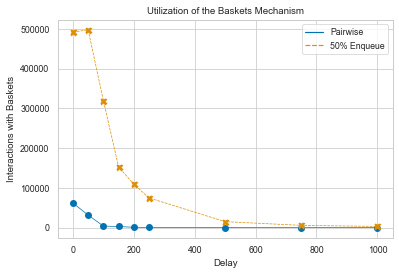

In [32]:
plot_number_of_baskets(df_pairwise, df_coin_toss, 5, False)


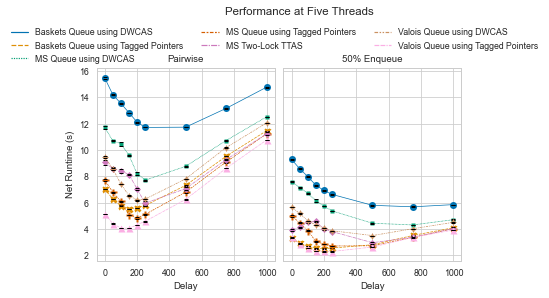

In [33]:
_ = plot_delay_and_threads(5, [df_pairwise, df_coin_toss], False)

## Six Threads and Above


At six threads, the non-blocking queues significantly outperform the *two-lock*
queue at every delay. This trend repeats itself up to 12 threads, with the
degree at which the non-blocking queues outperform the *two-lock queue*
increasing at every thread; the degree at which the *baskets queue* outperforms
the *MS-Queue* also grows with every thread.

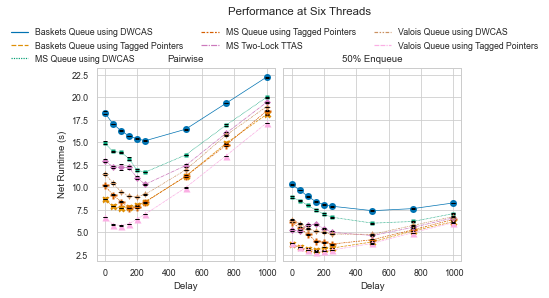

In [34]:
_ = plot_delay_and_threads(6, [df_pairwise, df_coin_toss], False)


# Coefficient of Variance


Due to the quantitative nature of this study,
variance plays a major role in determining the reproducibility of the study. An
arbitrary coefficient of variance of $5\%$ was chosen as the threshold for
acceptable reproducibility. From the whole dataset, only the *Baskets Queue* using Tagged Pointers at
one thread and 500 nanoseconds of delay (under the *pairwise benchmark*), and
the *MS Queue* using Tagged Pointers at the same number of threads and
delay (under the *50% enqueue benchmark*) had a coefficient of variance
higher than $5\%$ (**$5.700\%$** and **$7.424\%$** respectively). 

In [35]:
def get_coefficient_of_variance(df):
    df_group = df.groupby(by=["name", "threads", "delay"], as_index=False) \
        .agg(mean=(net_runtime_key, np.mean), stdev=(net_runtime_key, np.std))
    df_group["cov%"] = (np.array(df_group["stdev"]) / np.array(df_group["mean"])) * 100
    return df_group

def get_coefficient_of_variance_above_threshold(df, treshold:int):
    df_group = get_coefficient_of_variance(df)
    return df_group.loc[df_group["cov%"] >= treshold]

get_coefficient_of_variance_above_threshold(df_pairwise, 5)

,name,threads,delay,mean,stdev,cov%
114,Baskets Queue using Tagged Pointers,1,500,0.66148,0.03771,5.70087


In [36]:
get_coefficient_of_variance_above_threshold(df_coin_toss, 5)

,name,threads,delay,mean,stdev,cov%
330,MS Queue using Tagged Pointers,1,500,0.32922,0.02444,7.42453


The dataset's $99\%$
quantile for coefficient of variance is **$2.874\%$**.

In [37]:
data = get_coefficient_of_variance(df_pairwise).sort_values(by="cov%", ascending=True)
data["cov%"].quantile(0.99)

2.8735533207210446

# Effects of Delay on Performance
Valois and Hoffman et.al. note that backoff algorithms are required to improve the efficiency of concurrent algorithms. More often than not, a queue's optimal delay tends to be similar in consecutive threads, with the pattern changing once over-subscription is present. Between one and four threads, **$91.667\%$** (under the *pairwise benchmark*) and **$83.333\%$** (under the *50\% enqueue benchmark*) of all optimal net runtimes had a delay of **500 nanoseconds**. Between five and twelve threads, each queue's optimal delay slightly varies between zero and 250 nanoseconds. 

In [99]:
min_group = df_pairwise.groupby(
    by=["name", "threads", "delay"],
    as_index=False)[net_runtime_key].mean()

min_group = min_group.groupby(by=["name", "threads"],as_index=False) \
    .apply(lambda x: x.iloc[x[net_runtime_key].argmin()])

min_group.loc[
    (~min_group["name"].str.contains("DWCAS")) &
    (~min_group["name"].str.contains("Valois"))
]

,name,threads,delay,net_runtime_s
12,Baskets Queue using Tagged Pointers,1,100,0.56025
13,Baskets Queue using Tagged Pointers,2,500,2.60953
14,Baskets Queue using Tagged Pointers,3,500,2.55703
15,Baskets Queue using Tagged Pointers,4,500,2.92531
16,Baskets Queue using Tagged Pointers,5,150,5.53089
17,Baskets Queue using Tagged Pointers,6,100,7.67366
18,Baskets Queue using Tagged Pointers,7,100,9.15906
19,Baskets Queue using Tagged Pointers,8,150,10.95730
20,Baskets Queue using Tagged Pointers,9,100,11.60957
21,Baskets Queue using Tagged Pointers,10,100,13.56776


In [101]:
min_group.loc[
    (~min_group["name"].str.contains("Valois")) & 
    (~min_group["name"].str.contains("DWCAS")) & 
    (min_group["delay"] == 500) & 
    (min_group["threads"] <= 4)
].count() / 12 * 100

name            91.66667
threads         91.66667
delay           91.66667
net_runtime_s   91.66667
dtype: float64

In [103]:
min_group = df_coin_toss.groupby(by=["name", "threads", "delay"], as_index=False)[net_runtime_key].mean()
min_group = min_group.groupby(by=["name", "threads"], as_index=False).apply(lambda x: x.iloc[x[net_runtime_key].argmin()])
min_group.loc[(~min_group["name"].str.contains("DWCAS")) & (~min_group["name"].str.contains("Valois"))]

,name,threads,delay,net_runtime_s
12,Baskets Queue using Tagged Pointers,1,500,0.30620
13,Baskets Queue using Tagged Pointers,2,500,0.96903
14,Baskets Queue using Tagged Pointers,3,500,1.18292
15,Baskets Queue using Tagged Pointers,4,500,1.37895
16,Baskets Queue using Tagged Pointers,5,200,2.50383
17,Baskets Queue using Tagged Pointers,6,150,3.05405
18,Baskets Queue using Tagged Pointers,7,150,3.88322
19,Baskets Queue using Tagged Pointers,8,150,4.93751
20,Baskets Queue using Tagged Pointers,9,50,5.45622
21,Baskets Queue using Tagged Pointers,10,100,6.05012


In [104]:
min_group.loc[
    (~min_group["name"].str.contains("Valois")) & 
    (~min_group["name"].str.contains("DWCAS")) & 
    (min_group["delay"] == 500) & 
    (min_group["threads"] <= 4)
].count() / 12 * 100

name            83.33333
threads         83.33333
delay           83.33333
net_runtime_s   83.33333
dtype: float64